In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
from scipy.signal import butter,filtfilt
%matplotlib inline
%matplotlib widget

In [131]:
# ******************** Data from Admittance Control ***************** ##
#df = pd.read_csv("/home/unknown/Documents/PostDoc/bagfiles/rosbag2_Admittance/admittance.csv") 

# ******************** Data from Admittance Control ***************** ##
# df = pd.read_csv("/home/unknown/Documents/PostDoc/bagfiles/rosbag2_Admittance/admittance.csv") 

# ******************** Data from Candle Position ***************** ##
df = pd.read_csv("/home/unknown/Documents/PostDoc/bagfiles/rosbag2_candle/candle.csv") 

# # ******************** Data from HP ***************** ##
#df = pd.read_csv("/home/unknown/Documents/PostDoc/bagfiles/rosbag2_HP/HP.csv") 

# ******************** Data from Velocity control ***************** ##
# df = pd.read_csv("/home/unknown/Documents/PostDoc/bagfiles/rosbag2_VelControl/velctrl.csv") 

# ******************** Data from angular position control ***************** ##
# df = pd.read_csv("/home/unknown/Documents/PostDoc/bagfiles/rosbag2_link2/link2.csv") 

time = df['__time']
time =  (time.values - time.values[0])

### Data from testing only joint 2 (90 degrees, 180 etc)#######################################
tau1 = df['/jaco/manipulator_skillset/manipulator_skillset/joint/q1/effort'].fillna(method='ffill')
tau2 = df['/jaco/manipulator_skillset/manipulator_skillset/joint/q2/effort'].fillna(method='ffill')
tau3 = df['/jaco/manipulator_skillset/manipulator_skillset/joint/q3/effort'].fillna(method='ffill')
tau4 = df['/jaco/manipulator_skillset/manipulator_skillset/joint/q4/effort'].fillna(method='ffill')
tau5 = df['/jaco/manipulator_skillset/manipulator_skillset/joint/q5/effort'].fillna(method='ffill')
tau6 = df['/jaco/manipulator_skillset/manipulator_skillset/joint/q6/effort'].fillna(method='ffill')


In [132]:
def plot_states(tau, tauf, label):
    fig, ax = plt.subplots()
    plt.plot(tau,'r')
    plt.plot(tauf, '--b')
    ax.set_ylabel(r"$[deg/s]$", fontsize = 10)
    ax.legend((label[0], label[1]),loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
    plt.grid(True)

In [134]:
def butter_lowpass_filter(data, cutoff, order, fs):
    # Get the filter coefficients 
    sos = signal.butter(order, cutoff, 'lowpass', fs=fs, output='sos')
    y = signal.sosfilt(sos, data)
    return y

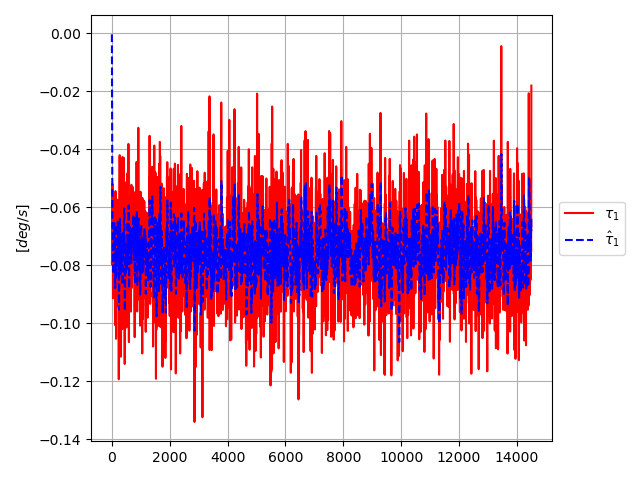

In [135]:
for i in range(len(time)):
    if np.isnan(tau1[i]):
        tau1[i] = tau1[3]
fs = 1000       
cutoff = 25    # desired cutoff frequency of the filter, Hz 
order = 2
y = butter_lowpass_filter(tau1, cutoff, order, fs)
label1 = [r"$\tau_1$",r"$\hat{\tau}_{1}$"]
plot_states(tau1,y, label1)

-0.00044694945119383705

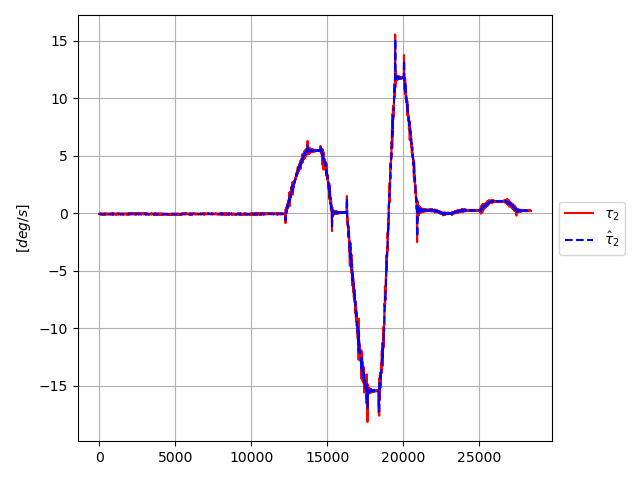

In [98]:
for i in range(len(time)):
    if np.isnan(tau2[i]):
        tau2[i] = tau2[3]
fs = 1000       
cutoff = 25    # desired cutoff frequency of the filter, Hz 
order = 2
dt=0.01
y2 = butter_lowpass_filter(tau2, cutoff, order)
label1 = [r"$\tau_2$",r"$\hat{\tau}_{2}$"]
plot_states(tau2,y2, label1)

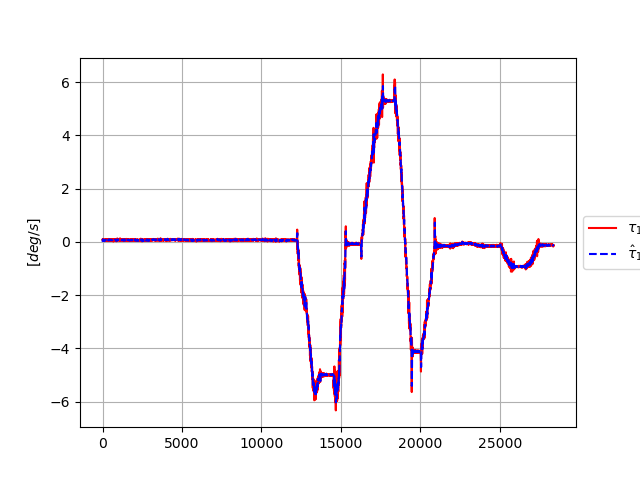

In [73]:
for i in range(len(time)):
    if np.isnan(tau3[i]):
        tau3[i] = tau3[3]
fs = 1000       
cutoff = 25    # desired cutoff frequency of the filter, Hz 
order = 2
dt=0.01
y3 = butter_lowpass_filter(tau3, cutoff, order)
label1 = [r"$\tau_1$",r"$\hat{\tau}_{1}$"]
plot_states(tau3,y3, label1)

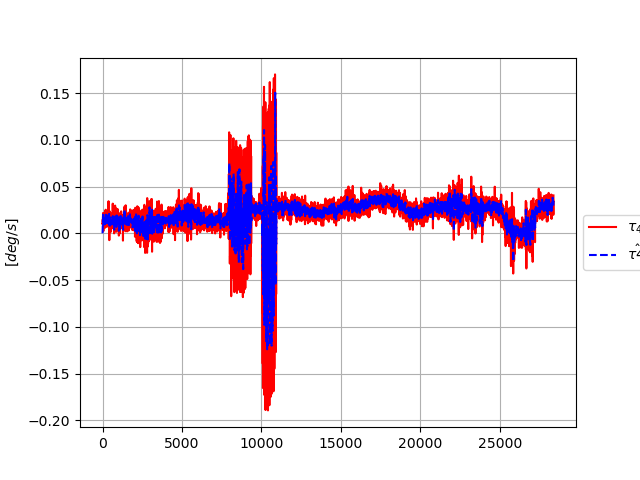

In [83]:
for i in range(len(time)):
    if np.isnan(tau4[i]):
        tau4[i] = tau4[3]
fs = 1000       
cutoff = 25    # desired cutoff frequency of the filter, Hz 
order = 2
dt=0.01
y4 = butter_lowpass_filter(tau4, cutoff, order)
label1 = [r"$\tau_4$",r"$\hat{\tau4}_{1}$"]
plot_states(tau4,y4, label1)

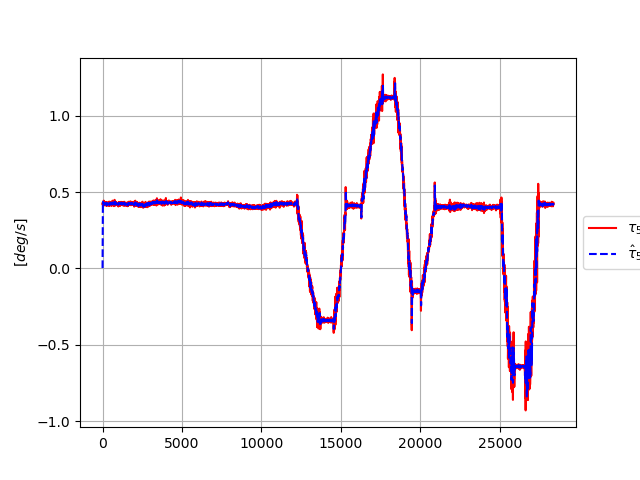

In [81]:
for i in range(len(time)):
    if np.isnan(tau5[i]):
        tau5[i] = tau5[3]
fs = 1000       
cutoff = 25    # desired cutoff frequency of the filter, Hz 
order = 2
dt=0.01
y5 = butter_lowpass_filter(tau5, cutoff, order)
label1 = [r"$\tau_5$",r"$\hat{\tau}_{5}$"]
plot_states(tau5,y5, label1)

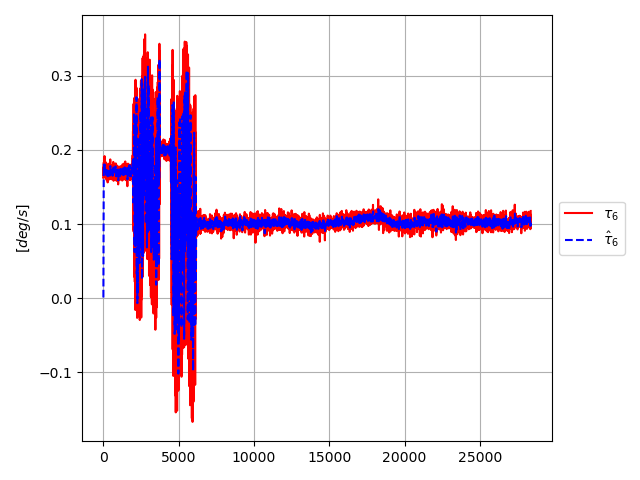

In [108]:
for i in range(len(time)):
    if np.isnan(tau6[i]):
        tau6[i] = tau6[3]
fs = 1000       
cutoff = 25    # desired cutoff frequency of the filter, Hz 
order = 2
y6 = butter_lowpass_filter(tau6, cutoff, order)
label1 = [r"$\tau_6$",r"$\hat{\tau}_{6}$"]
plot_states(tau6,y6, label1)